In [1]:
#Predicting how many medals a country will win in the olympics

In [2]:
import pandas as pd

In [3]:
teams = pd.read_csv("teams.csv")

In [4]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [6]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [7]:
import numpy as np
teams_numeric = teams.select_dtypes(include=[np.number])
teams_numeric.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [44]:
import seaborn as sns

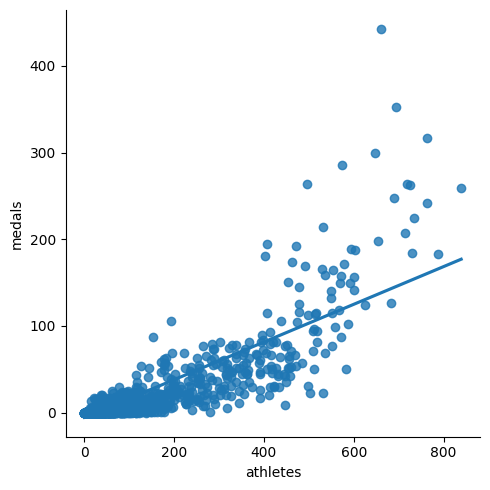

In [45]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

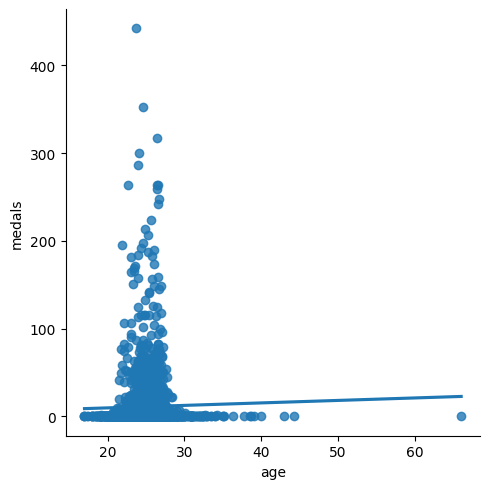

In [46]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

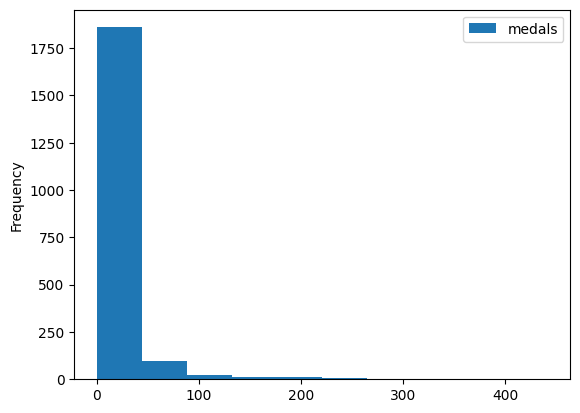

In [47]:
teams.plot.hist(y="medals")

In [48]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


In [13]:
teams = teams.dropna()

In [14]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [15]:
train.shape

(1609, 7)

In [16]:
test.shape

(405, 7)

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [18]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [19]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [20]:
predictions = reg.predict(test[predictors])

In [21]:
test["predictions"] = predictions

In [22]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [23]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [24]:
test["predictions"] = test["predictions"].round()

In [25]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [26]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])

In [27]:
error

np.float64(3.2987654320987656)

In [28]:
teams.describe()["medals"] #error should be lower than std

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [29]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [30]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [31]:
errors = (test["medals"] - predictions).abs()

In [32]:
errors

6       1.961221
7       1.176333
24      1.425032
25      1.711847
37      1.155629
          ...   
2111    1.926958
2131    1.640143
2132    1.640143
2142    1.505767
2143    0.080748
Name: medals, Length: 405, dtype: float64

In [33]:
error_by_team = errors.groupby(test["team"]).mean()

In [34]:
error_by_team

team
AFG    1.568777
ALB    1.568439
ALG    1.535133
AND    1.783551
ANG    0.322667
         ...   
VIE    1.231905
VIN    1.891106
YEM    1.891106
ZAM    1.640143
ZIM    0.793257
Name: medals, Length: 204, dtype: float64

In [35]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [36]:
error_ratio = error_by_team / medals_by_team

In [37]:
error_ratio

team
AFG    3.137554
ALB         inf
ALG    1.023422
AND         inf
ANG         inf
         ...   
VIE    1.231905
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [38]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [39]:
error_ratio

team
AFG    3.137554
ALG    1.023422
ARG    0.841636
ARM    0.433824
AUS    0.362901
         ...   
UKR    0.946412
USA    0.128207
UZB    0.658187
VEN    1.710208
VIE    1.231905
Name: medals, Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

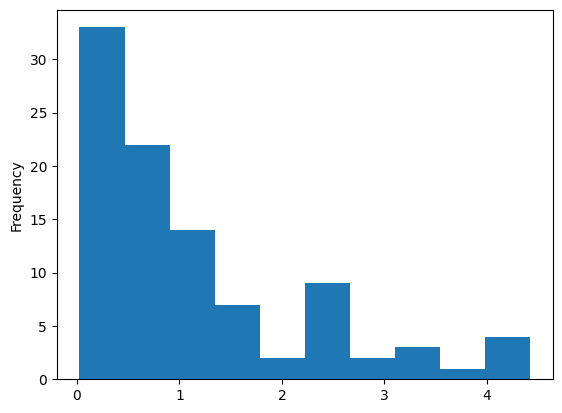

In [40]:
error_ratio.plot.hist()

In [41]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64